In [1]:
import sys
sys.path.append('..')
from src.hou import Hou
from src.physics import Physics
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

sea.set()
hou = Hou()
phys = Physics()

In [14]:
#Index array
n_arr = [1.00, 1.43, 2.24, 3.25, 1.00, 3.25, 3.25, 2.24, 1.43, 1.000]
#Thickness array [m]
def d_arr(gap):
    return np.array([0.000, 0.209, 0.133, 1.800, gap, 1.800, 1.800, 0.133, 0.209, 0.000])*1.e-3
#Loss tangent array
lt_arr = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
#Frequency array [Hz]
freq_arr = np.linspace(200., 300., 101)*1.e9
#Frequency bands [Hz]
band_names = ["220 GHz", "270 GHz"]
num_bands = len(band_names)
band_centers = np.array([227.0, 275.0])*1.e9
band_widths = np.array([0.200, 0.150])
band_los = band_centers*(1.0 - 0.5*band_widths)
band_his = band_centers*(1.0 + 0.5*band_widths)
bands = [(freq_arr >= band_los[ii])*(freq_arr <= band_his[ii]) for ii in range(num_bands)]
#bands = np.array([np.arange(bc*(1. - 0.5*band_widths[ii]), bc*(1. + 0.5*band_widths[ii]), 50) for ii,bc in enumerate(band_centers)])
#Air gap size [mm]
gap_sizes = np.linspace(0, 100, 101)*1.e-3

In [15]:
#Calculate reflection vs air gap size
refl = [hou.calc(n_arr, d_arr(gap_size), lt_arr, freq_arr)[3] for gap_size in gap_sizes]
#Calculate band-averaged reflection
band_avg_refl = [[np.mean(r*bands[ii]) for r in refl] for ii in range(num_bands)]

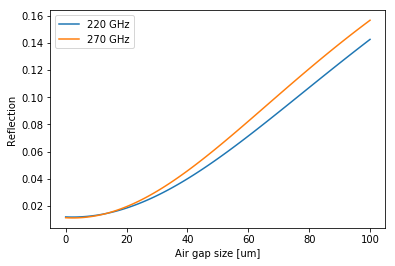

In [18]:
#Plot band-averaged reflection vs air gap size
for ii in range(num_bands):
    plt.plot(gap_sizes*1.e3, band_avg_refl[ii], label=band_names[ii]) 
plt.xlabel("Air gap size [um]")
plt.ylabel("Reflection")
plt.legend()
plt.show()